----------------------------------------------------------------------------------------------------------------------------------------------------

## Python Imports

In [38]:
from IPython.display import Image
from IPython.core.display import HTML
import pickle

#Import Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# from yellowbrick.regressor import ResidualsPlot

#Importing Dependencies
import pandas as pd
import numpy as np
from numpy import nan
import ast
import requests
from urllib.parse import urljoin, urlunsplit, urlparse
import bs4
from bs4 import BeautifulSoup
from bs4.element import Comment

from collections import Counter
from string import punctuation
import csv

import newspaper
from newspaper import Article
from newspaper import fulltext


#Tokenization Of Sentences
import nltk
# nltk.download('punkt')

#Readability Scores
import textstat

import pickle

In [39]:
from sklearn.linear_model import LinearRegression, ElasticNetCV, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler

#GridSearch
from sklearn.model_selection import GridSearchCV

#Scipy Integration for Sparse Matrixes
from scipy import sparse

#Additional Feature Engineering - NLP Text Data Import
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
cleaned_df = pd.read_pickle('Ignore/merged_web_page_data.pkl')

## Executive Summary

The primary aim for this captstone project was to predict the number of shares an article would gain after being published for 1 year. 

The topics selected were:
    
- affiliate-marketing
- content-marketing
- copywriting
- display-advertising
- email-marketing
- growth-hacking-buzzsumo
- influencer-marketing
- link-building-buzzsumo
- marketing-automation
- performance-marketing
- podcast-marketing
- search-engine-marketing
- social-media-marketing
- video-marketing
- website-design   

The metrics for evaluation will be MeanSquaredError (MSE) and the R2 Score from cross validation with the train test splits of either standalone models or gridsearch best_estimators_.

Using a variety of regression models, the highest predictive score achieved was 0.85 r2 score from 100 random forest estimators as an ensemble method. Taking the logirithim + 1 of our target variable ('Total Shares') allowed us to improve the model's predictions from 0.35 r2 score --> 0.85. 

The most important coefficients that impact the sharability of an article are:

- Evergreen Score
- Does the article have article amplifiers? (True / False)
- Does The Article Page Have Referring Domains

Negative coefficients that decreased the chance of an article being shared are:

- Number of Linking Pages
- SSL Encryption (dummied)
- Meta Description Length

-------------------------------------------------------------------------------------------------------------------------------

The predictive power that we have gained is only applicable to models that are 1 year or older as this is where our sampling was applied.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Audience ###

Digital marketers are looking to understand what are the key factors/variables that can make an article more shareable than another. Being able to discover what are the core components of an article's success will enable marketers to include these within their future articles.

## Objective

To predict the number of shares an article will accumulate after 1 year. This allows us to avoid the additional bias as some articles accumulate a large amount of shares quickly due to the news cycle.

The factors that we will use to predict the shares of every article include the following:
    
- Technical On-Page Metrics (Page Load Speed, No SSL/SSL etc).
- On-Page Word Metrics (Word Count, Unique Word Count, Number of Sentences).
- Unique, Impactful Words via TF-IDF Vectorization (Every word is counted and assigned a score via the TF-IDF algorithim).
- Link Metrics: The number of backlinks pointing to the HTML page.
- Buzzsumo Metrics: Evergreen Score + Article Amplifiers.

---------------------------------------------------------------------------------------------------------------------------------------------------

## The Process

### 1. Data Collection

- 30,000 Article URL's were collected from BuzzSumo's Pro Plan from XX to XX.
- A custom web crawler was created that allowed for the extraction of 61 metrics including the article text, HTML content.
- <a href= 'https://developers.google.com/speed/docs/insights/v5/get-started' >Google's Page Speed API was utilised to extract page speed metrics for every article. </a>
- Additionally 15 topics were selected within the digital marketing niche to see if changing the topic of an article could influence it's shareability. 


------------------------------------------------------------------------------------------------------------------------------------------------

### 2. Pre-processing

Firstly 15 topics were downloaded from BuzzSumo's pro plan, these topics were selected by performing keyword research in Ahrefs, we selected the keywords that had the highest amount of volume to form our topics. Every row within each spreadsheet was was labelled with it's appropriate topic.

<img src='Images/Topics To Analyse.png' >

Afterwards we created a data structure for the Python Web Crawler which would enable us to extract important features from the scraped articles.

<img src='Images/data-structure.png' >

### Cleaning The BuzzSumo Data

<img src='Images/BuzzSumo_Data.png'  >

Our target variable is defined as the total_shares in column D, there were additional columns that we decided to drop such as:
    
- Thumbnail 
- Video
- twitter_shares, pinterest_shares, total_reddit_engagement (These metrics are directly correlated with our target variable and therefore we cannot use them within our machine learning models) 

#### Dummifying Variables

Additionally we decided to 'dummify' the non-numerical columns so that we could use them as features. An example of this is easily explained with the different article types that BuzzSumo has provided us with:
    

<img src='Images/article_types.png' />

<img src='Images/article_type_second.png' />

#### 1. Merging Datasets (BuzzSumo + Web Scraped Data)

Both of these datasets were then merged which enabled us to not only use BuzzSumo's metrics for prediction, but also any useful features from the crawled articles. Our dataset size was 15,963 articles and contained 67 features.

<img src='Images/cleaned_data.png' >

#### 2. Merging Datasets (Cleaned DataFrame + WebPageSpeed Data From Google Page Speed Insights API)

<img src='Images/Web_Page_Speed_Data.png' >

-----------------------------------------------------------------------------------------------------------------------------

<img src='Images/Google Page Speed.png' width=390px >

During a 1 week period the <a href='https://developers.google.com/speed/docs/insights/v5/get-started' > Google Page Speed Insights API was queried for 1 week. </a>. The web page speed data was obtained for 14469/15743 URL's. Then the two datasets were merged by the URL as the foreign key for both dataframes. 

------------------------------------------------------------------------------------------------------------------------------------------------

## 3. EDA

In [46]:
cleaned_df

,Url,Evergreen_Score,Total_Shares,Published_Date,Word_Count,num_linking_domains,Article_Text,Article_Text_Length,Has_Top_Image,Number_of_Movies,...,"article_types_['list', 'infographic', 'general_article']","article_types_['list', 'newsletter', 'general_article']","article_types_['newsletter', 'general_article']","article_types_['what_post', 'general_article']","article_types_['what_post', 'infographic', 'general_article']","article_types_['what_post', 'newsletter', 'general_article']","article_types_['why_post', 'general_article']","article_types_['why_post', 'newsletter', 'general_article']",First_Contentful_Paint,First_Interactive
0,https://gatheringdreams.com/affiliate-marketin...,1.54,8021,2018-08-23,4767,1.0,"Some of the links below are affiliate links, s...",27301,1,0,...,0,0,0,0,0,0,0,0,3.5,16.1
1,https://itsclaudiag.com/2018/09/how-to-use-aff...,1.44,2569,2018-09-16,1181,2.0,Would you like to make money while you sleep?\...,6519,1,0,...,0,0,0,0,0,0,0,0,5.2,9.2
2,https://www.entrepreneur.com/article/319017,5.68,844,2018-09-12,996,12.0,Learn three simple strategies to help you stac...,5916,1,0,...,0,0,0,0,0,0,0,0,3.2,13.0
3,https://onlinemediamasters.com/how-to-make-mon...,1.30,775,2018-09-22,8996,3.0,I never thought this would happen to me.\n\nIn...,39589,1,0,...,0,0,0,0,0,0,0,0,2.5,18.3
4,https://www.finsavvypanda.com/how-to-make-mone...,1.53,614,2018-10-09,2226,1.0,This post may contain affiliate links. Please ...,12657,1,0,...,0,0,0,0,0,0,0,0,4.7,21.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14464,https://purplecowagency.com/what-kind-of-busin...,0.00,0,2018-10-02,454,0.0,Relationships matter more than ever in busines...,2742,1,0,...,0,0,0,0,0,0,0,0,4.4,7.2
14465,https://edlio.com/apps/pages/Eastern-Lancaster...,0.00,0,2018-09-28,82,0.0,This week we are featuring the school website ...,506,1,0,...,0,0,0,0,0,0,0,0,4.0,11.7
14466,https://purplecowagency.com/content-curation-h...,0.00,0,2018-10-02,565,0.0,Content curation involves searching and gather...,3399,1,0,...,0,0,0,0,0,0,0,0,4.3,7.3
14467,https://purplecowagency.com/easy-email-marketi...,0.00,0,2018-10-02,1024,0.0,"When it comes to communication, email is still...",6079,1,0,...,0,0,0,0,0,0,0,0,4.5,7.1


In [10]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14469 entries, 0 to 14468
Data columns (total 69 columns):
Url                                                                   14469 non-null object
Evergreen_Score                                                       14469 non-null float64
Total_Shares                                                          14469 non-null int64
Published_Date                                                        14469 non-null datetime64[ns]
Word_Count                                                            14469 non-null int64
num_linking_domains                                                   14469 non-null float64
Article_Text                                                          14469 non-null object
Article_Text_Length                                                   14469 non-null int64
Has_Top_Image                                                         14469 non-null int64
Number_of_Movies                                         

In [11]:
cleaned_df.describe()

,Evergreen_Score,Total_Shares,Word_Count,num_linking_domains,Article_Text_Length,Has_Top_Image,Number_of_Movies,Article_Is_Media_News,Number_Of_Images,Is_Valid_Body,...,"article_types_['list', 'infographic', 'general_article']","article_types_['list', 'newsletter', 'general_article']","article_types_['newsletter', 'general_article']","article_types_['what_post', 'general_article']","article_types_['what_post', 'infographic', 'general_article']","article_types_['what_post', 'newsletter', 'general_article']","article_types_['why_post', 'general_article']","article_types_['why_post', 'newsletter', 'general_article']",First_Contentful_Paint,First_Interactive
count,14469.000000,14469.000000,14469.000000,14469.000000,14469.000000,14469.000000,14469.000000,14469.000000,14469.000000,14469.000000,...,14469.000000,14469.000000,14469.000000,14469.000000,14469.000000,14469.000000,14469.000000,14469.0,14469.000000,14469.000000
mean,0.527305,62.537563,661.707167,1.055913,3876.142512,0.968484,0.076992,0.011404,13.324694,0.582763,...,0.001382,0.000346,0.007948,0.021632,0.000138,0.000069,0.020734,0.0,3.741634,14.512461
std,1.625998,411.285889,881.566752,7.094390,4671.986863,0.174713,0.589057,0.106181,17.520206,0.493120,...,0.037154,0.018587,0.088800,0.145485,0.011757,0.008313,0.142497,0.0,2.046454,9.820514
min,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.600000,0.600000
25%,0.000000,1.000000,143.000000,0.000000,773.000000,1.000000,0.000000,0.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.500000,8.500000
50%,0.170000,2.000000,476.000000,0.000000,2824.000000,1.000000,0.000000,0.000000,10.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.300000,12.100000
75%,0.360000,12.000000,901.000000,0.000000,5441.000000,1.000000,0.000000,0.000000,17.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.400000,18.300000
max,49.140000,31499.000000,25219.000000,398.000000,96995.000000,1.000000,26.000000,1.000000,821.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,30.300000,179.700000


In [23]:
cleaned_df.dtypes

Url                                                                           object
Evergreen_Score                                                              float64
Total_Shares                                                                   int64
Published_Date                                                        datetime64[ns]
Word_Count                                                                     int64
num_linking_domains                                                          float64
Article_Text                                                                  object
Article_Text_Length                                                            int64
Has_Top_Image                                                                  int64
Number_of_Movies                                                               int64
Article_Is_Media_News                                                          int64
Number_Of_Images                                                 

In [24]:
numerical_columns = cleaned_df.select_dtypes(np.number)
text_columns = cleaned_df.select_dtypes('object')

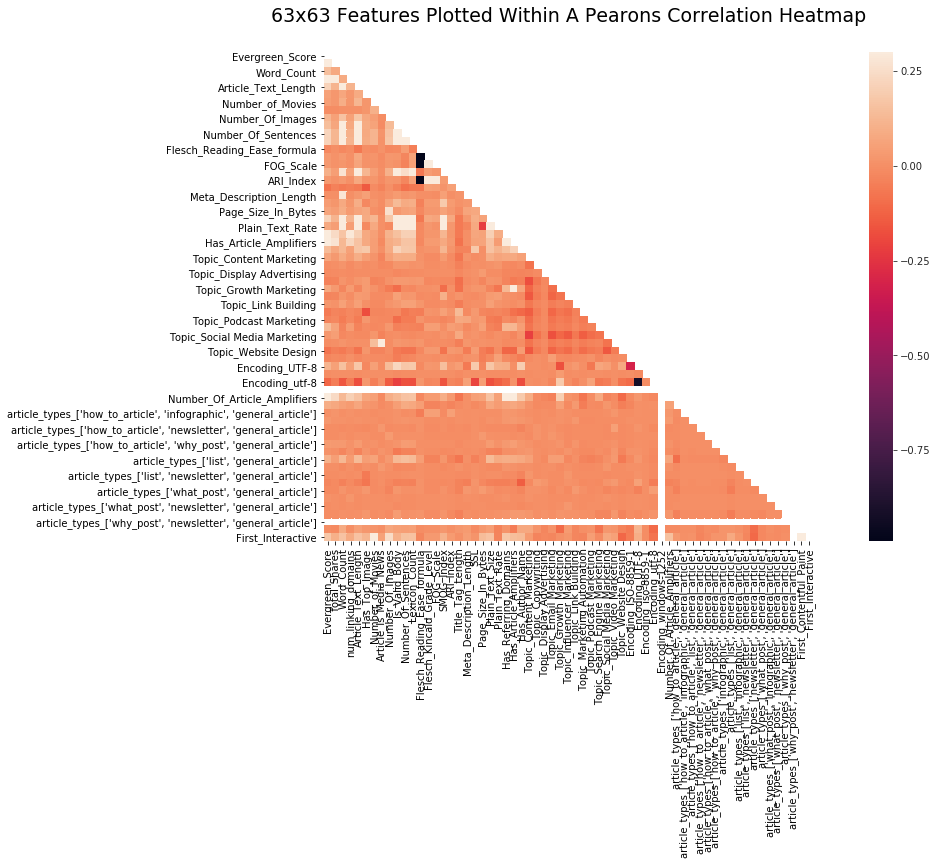

In [25]:
fig, ax = plt.subplots(figsize=(20,9))
label = ax.set_title('63x63 Features Plotted Within A Pearons Correlation Heatmap', fontsize = 19, pad=30)
corr = numerical_columns.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)
plt.savefig('correlation_heatmap',dpi=200)

In [26]:
def correlation_heat_map(df):
    corrs = df.corr()
    corrs = df.corr()[(df.corr() < 1.0) & (df.corr() > 0.25) | (df.corr() < -0.25)].dropna(how='all')
    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(22, 10))

    # # Plot the heatmap with seaborn.
    ax = sns.heatmap(corrs, annot=True, cmap='coolwarm', linewidths=2)
    label = ax.set_title('Investigating The Correlations Between Article Variables', fontsize = 24, pad=30)
    plt.savefig('correlation_heatmap_2',dpi=200)

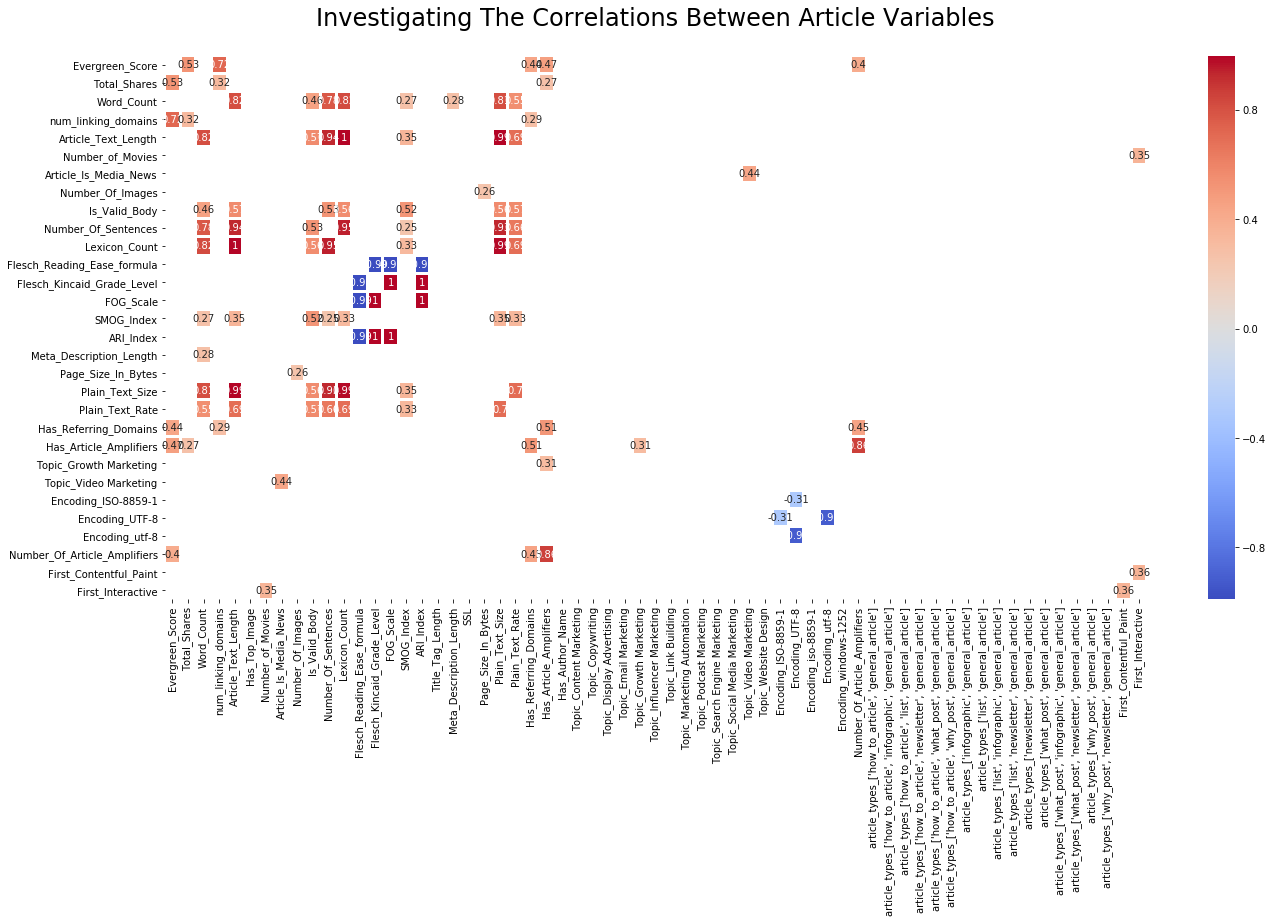

In [27]:
correlation_heat_map(cleaned_df)

In [28]:
cleaned_df.corr()[['Total_Shares']].sort_values(by='Total_Shares', ascending=False)[1:].head(12)

,Total_Shares
Evergreen_Score,0.529737
num_linking_domains,0.323450
Has_Article_Amplifiers,0.271738
Has_Referring_Domains,0.244202
Number_Of_Article_Amplifiers,0.242462
Number_Of_Sentences,0.122163
Lexicon_Count,0.119598
Plain_Text_Size,0.115765
Article_Text_Length,0.115323
First_Interactive,0.103286


In [29]:
cleaned_df.corr()[['Total_Shares']].sort_values(by='Total_Shares', ascending=False).tail(12)

,Total_Shares
"article_types_['newsletter', 'general_article']",-0.012763
Encoding_ISO-8859-1,-0.013549
First_Contentful_Paint,-0.015268
Topic_Podcast Marketing,-0.018183
Topic_Influencer Marketing,-0.022908
Topic_Marketing Automation,-0.029547
Topic_Email Marketing,-0.036242
Title_Tag_Length,-0.041045
Topic_Website Design,-0.044245
Encoding_utf-8,-0.051097


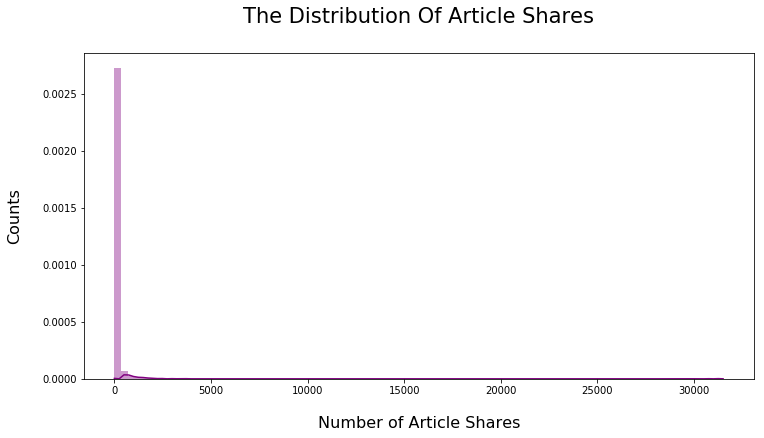

In [30]:
fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(cleaned_df['Total_Shares'], color='purple', bins=90)
plt.title('The Distribution Of Article Shares', pad=30, fontsize='21')
plt.xlabel('Number of Article Shares', fontsize='16', labelpad=20)
plt.ylabel('Counts',  fontsize='16', labelpad=20)
plt.savefig('Article_Share_Distribution',dpi=200)
plt.show()

#### Article Data EDA - Distributions For Positively Correlated Predictor Variables In Relation To The Target Variable

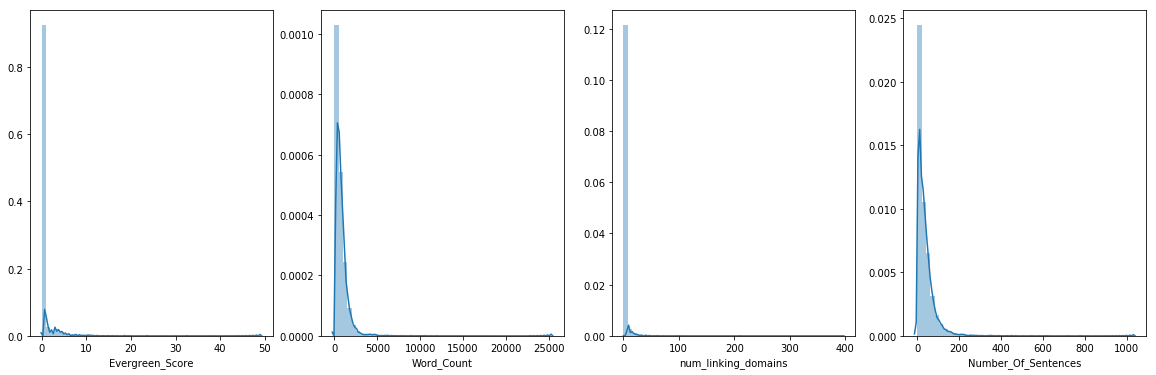

In [31]:
fig, (ax1, ax2,  ax3, ax4) = plt.subplots(figsize=(20, 6), ncols=4)
sns.distplot(cleaned_df['Evergreen_Score'].sort_values(ascending=False), ax = ax1)
sns.distplot(cleaned_df['Word_Count'].sort_values(ascending=False), ax = ax2)
sns.distplot(cleaned_df['num_linking_domains'].sort_values(ascending=False), ax = ax3)
sns.distplot(cleaned_df['Number_Of_Sentences'].sort_values(ascending=False), ax = ax4)
plt.savefig('X_Predictor_Variables_1',dpi=200)
plt.show()

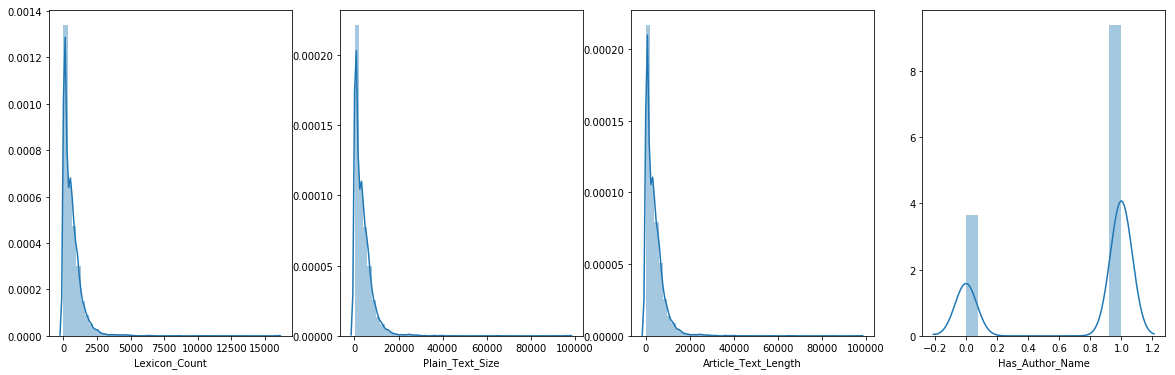

In [32]:
fig, (ax1, ax2,  ax3, ax4) = plt.subplots(figsize=(20, 6), ncols=4)

sns.distplot(cleaned_df['Lexicon_Count'].sort_values(ascending=False), ax = ax1)
sns.distplot(cleaned_df['Plain_Text_Size'].sort_values(ascending=False), ax = ax2)
sns.distplot(cleaned_df['Article_Text_Length'].sort_values(ascending=False), ax = ax3)
sns.distplot(cleaned_df['Has_Author_Name'].sort_values(ascending=False), ax = ax4)
plt.savefig('X_Predictor_Variables_2',dpi=200)

plt.show()

The most positively correlated predictor variables are exponentially distributed or at least have extremely skewed distributions. This might mean that we are unable to form a linear relationship with the target variable within it's standard scale. Applying a custom transformation might need to be applied to the target variable in order to achieve a better, more linear relationship with our predictor matrix.

#### Article Types EDA - What Article Type Is Shared Mostly Frequently?

In [32]:
article_types = [(x, cleaned_df.groupby(x)) for x in cleaned_df.columns if x.startswith('article')]

In [35]:
article_data = [(item[0], item[1].Total_Shares.mean().values[1]) for item in article_types]

IndexError: index 1 is out of bounds for axis 0 with size 1

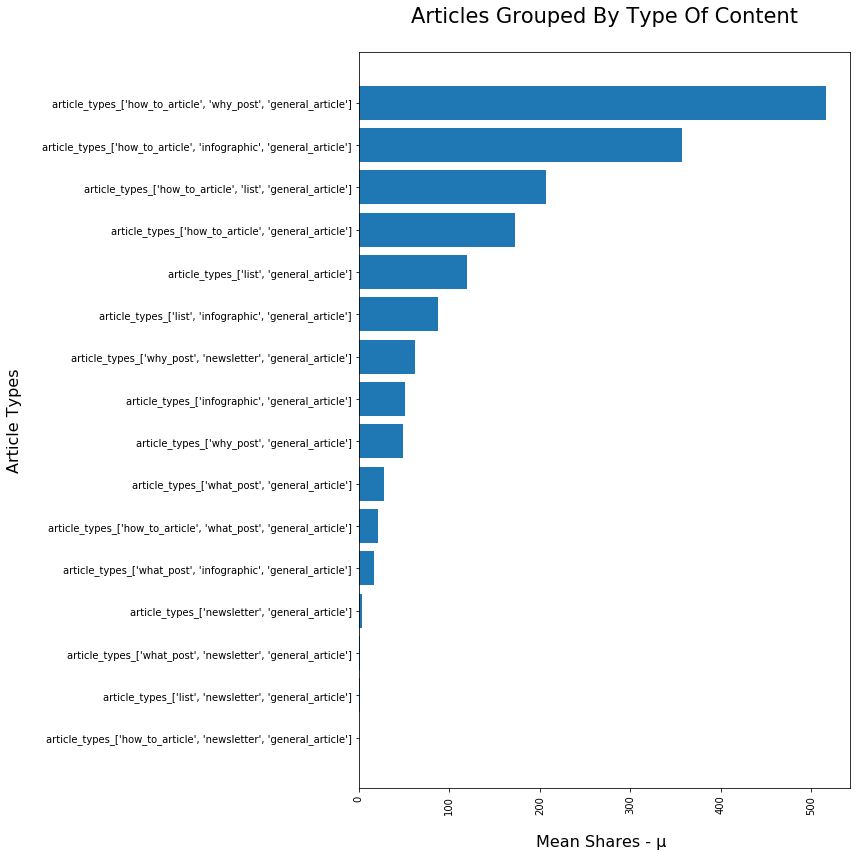

In [45]:
article_types = [(x, cleaned_df.groupby(x)) for x in cleaned_df.columns if x.startswith('article')]
fig, ax = plt.subplots(figsize=(12,12))
article_data = [(item[0], item[1].Total_Shares.mean().values[-1]) for item in article_types]
article_data.sort(key= lambda x: x[1])
plt.barh([item[0] for item in article_data], width = [item[1] for item in article_data] )
plt.xticks(rotation = 90)
plt.xlabel('Mean Shares - μ ', fontsize='16', labelpad=20)
plt.ylabel('Article Types',  fontsize='16', labelpad=20)
plt.title('Articles Grouped By Type Of Content', pad=30, fontsize='21')
plt.tight_layout()
plt.savefig('Article_Types',dpi=200)
plt.show()

Articles that are tagged "how to articles" & "why post" on average received the most amount of shares, this was followed by infographics and list articles. Therefore the insight that we can gain from this is that people reading digital marketing topics share on average content that is educational (how to), visual (infographic) and easily digestible (list articles).

#### Topic Type EDA - What Topic Is Shared Mostly Frequently?

In [18]:
group_by_objects = []

for x in cleaned_df.columns:
    if x.startswith('Topic_'):
        group_by_objects.append((x , cleaned_df.groupby(x)))

In [19]:
topic_data = [(item[0], item[1].Total_Shares.mean().values[1]) for item in group_by_objects]
topic_data.sort(key= lambda x: x[1])

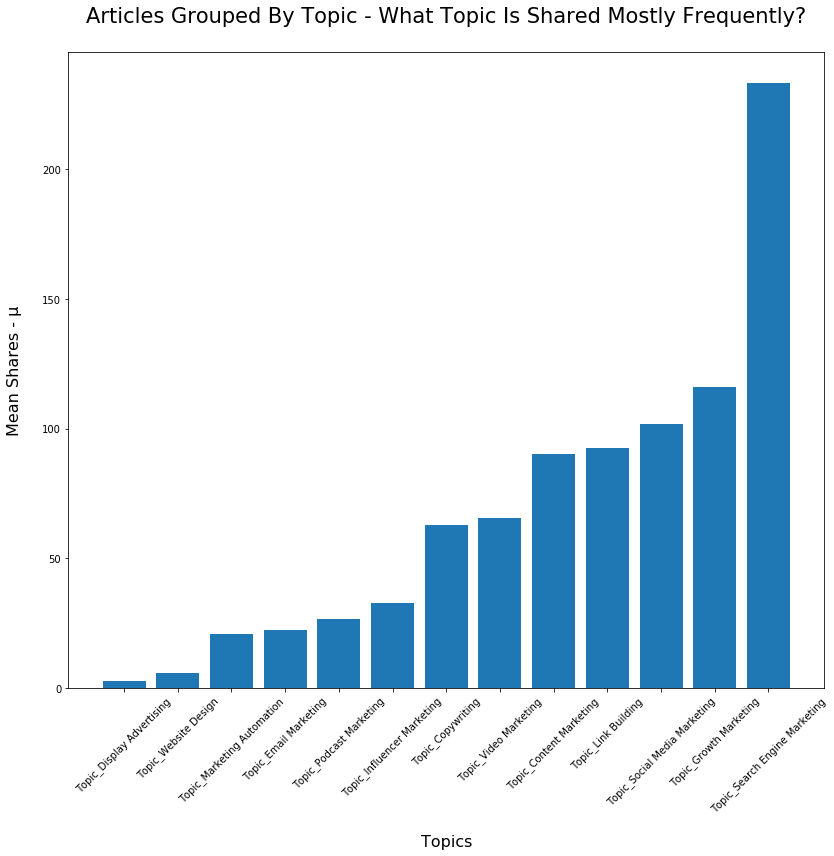

In [28]:
fig, ax = plt.subplots(figsize=(12,12))
plt.bar([item[0] for item in topic_data], height = [item[1] for item in topic_data])
plt.xticks(rotation = 45)
plt.xlabel('Topics', fontsize='16', labelpad=20)
plt.ylabel('Mean Shares - μ',  fontsize='16', labelpad=20)
plt.title('Articles Grouped By Topic - What Topic Is Shared Mostly Frequently?', pad=30, fontsize='21')
plt.tight_layout()
plt.savefig('Article_Topic_Types',dpi=200)
plt.show()

Search Engine Marketing was the most shared topic with Growth Marketing & Social Media Marketing coming 2nd and 3rd. The total number of shares was considerably low for website deisgn and display advertising and therefore I would recommend focusing on alternative trendy/shareable topics.

------------------------------------------------------------------------------------------------------------------------

### 4. Model Selection + Evaluation

As we will be using TF-IDF, our matrices are sparse matrices and are ~3,000 columns by 15,000 rows. A custom pipeline and grid search was created, which allows us to not only tune our model's paramters but also to optimise the TFID pre-processing stage. Additionally we decided to try the following models:

- Linear Regression
- Ridge (Linear Regression)
- Lasso (Linear Regression)
- Decision Tree Regressor
- RandomForest Regressor (100 RandomForest Models)
- ADA GradientBoostingRegressor with a RandomForest Ensemble

### 5. Results / Findings

In [6]:
df = pickle.load(open('results.pkl', 'rb')).reset_index(drop=True)
df

,Data_Used,Data_Type,Model_Name,Model_Training_Score,Model_Test_Score,Mean_Squared_Error,Model_Cross_Val_Score,Coefficients/Feature_Importances,Grid_Search_Best_Params / Regularization_Params,Notes
0,Numerical,Non-Logged Data,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.533955,0.155411,460883.697684,-3.677588e+19,"{'coefficient_values': [223.7456730565131, -8....",No Grid Search Used,"LinearRegression(copy_X=True, fit_intercept=Tr..."
1,Numerical,Non-Logged Data,"RidgeCV(alphas=array([1.00000e-05, 1.26186e-05...",0.533842,0.155194,461001.734275,5.400575e-01,"{'coefficient_values': [220.37598710911834, -8...",58.5702,"RidgeCV(alphas=array([1.00000e-05, 1.26186e-05..."
2,Numerical,Non-Logged Data,"LassoCV(alphas=array([1.00000e-05, 1.26186e-05...",0.533555,0.155288,460950.479850,5.404661e-01,"{'coefficient_values': [222.03808027737844, -6...",0.559081,"LassoCV(alphas=array([1.00000e-05, 1.26186e-05..."
3,Numerical,Logged,"DecisionTreeRegressor(criterion='mse', max_dep...",1.000000,0.701080,0.900788,7.018761e-01,{'feature_importance_values': [0.3173539791750...,No Grid Search Used / Regularization Used,"DecisionTreeRegressor(criterion='mse', max_dep..."
4,Numerical,Logged,"RandomForestRegressor(bootstrap=True, criterio...",0.980080,0.854972,0.437038,8.547309e-01,{'feature_importance_values': [0.3591549644615...,No Grid Search Used / Regularization Used,"RandomForestRegressor(bootstrap=True, criterio..."
5,Numerical,Logged,AdaBoostRegressor(base_estimator=RandomForestR...,0.970121,0.804518,0.589082,8.013276e-01,{'feature_importance_values': [0.7574930508186...,No Grid Search Used / Regularization Used,AdaBoostRegressor(base_estimator=RandomForestR...
6,Numerical,Logged,AdaBoostRegressor(base_estimator=RandomForestR...,0.979795,0.859630,0.439756,8.568030e-01,{'feature_importance_values': [0.5520762574707...,No Grid Search Used / Regularization Used,AdaBoostRegressor(base_estimator=RandomForestR...


In [50]:
df.iloc[:, [0,1, 2,3, 4, 6]]

,Data_Used,Data_Type,Model_Name,Model_Training_Score,Model_Test_Score,Model_Cross_Val_Score
0,Numerical,Non-Logged Data,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.533955,0.155411,-3.677588e+19
1,Numerical,Non-Logged Data,"RidgeCV(alphas=array([1.00000e-05, 1.26186e-05...",0.533842,0.155194,5.400575e-01
2,Numerical,Non-Logged Data,"LassoCV(alphas=array([1.00000e-05, 1.26186e-05...",0.533555,0.155288,5.404661e-01
3,Numerical,Logged,"DecisionTreeRegressor(criterion='mse', max_dep...",1.000000,0.701080,7.018761e-01
4,Numerical,Logged,"RandomForestRegressor(bootstrap=True, criterio...",0.980080,0.854972,8.547309e-01
5,Numerical,Logged,AdaBoostRegressor(base_estimator=RandomForestR...,0.970121,0.804518,8.013276e-01
6,Numerical,Logged,AdaBoostRegressor(base_estimator=RandomForestR...,0.979795,0.859630,8.568030e-01


The most impactful model was as a logged target variable, with 5 bagged forest random regressor's which served as the base estimator for the AdaBoostRegressor model. 

Additionally by adding the web page speed data from Google Page Speed Insights, <strong> the mean cross validation score increased on our best model by ~ 5%. </strong>

---------------------------------------------------------------------------------------------------------------------------------

#### NLP Text Data

Firstly NLP Text Data which was extracted via a TFID vectorizer caused the linear regression and decision tree models scores to decline. Therefore it was excluded from the further experiments. This is likely due to overfitting on noisey text data, additionally random forests struggle to use all of the correct features as a matrix increases in size and sparsity.

#### Linear Regression

The linear regression model with non-logged data produced better scores than our baseline, however the mean cross validation scores were negative. This suggested that there was some multi-colinearility inside of the data, which was reduced after applying regularization via the Lasso + Ridge regression models. 

In [ ]:
lasso_residuals = pickle.load(open('lasso_residuals.pkl', 'rb'))

In [ ]:
# Residual Plot
fig, ax = plt.subplots(figsize=(20,9))
sns.distplot(lasso_residuals)
plt.xlabel('', fontsize='16', labelpad=20)
plt.title('The Distribution Of Residuals From A LassoCV Model', pad=30, fontsize='25')
plt.savefig('Residuals_Distribution',dpi=200)
plt.show()

After taking the logarithim of the target variable, applying LassoCV and viewing the residuals we can see that the distribution is normally distributed which means we can reliably make inference from the coefficient values (the regression model relies on the assumption that the residuals are normally distributed).

In [ ]:
## Lasso Coeficients ###
lasso_coefficients = pickle.load(open('lasso_coefficients.pkl', 'rb'))
lasso_coefficients.columns = ['Coefficients']

fig, ax = plt.subplots(figsize=(20,9))
x_values =  lasso_coefficients.sort_values(by='Coefficients', ascending=False).head(10).index
sns.barplot(x=x_values, y='Coefficients', 
            data=lasso_coefficients.sort_values(by='Coefficients', ascending=False).head(10))
plt.xticks(rotation = 25)
label = ax.set_title('The Top 10 Positive Coefficients From A LassoCV Model', fontsize = 24, pad=30)
plt.savefig('Positive_Coefficients_Lasso_Model',dpi=200)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20,9))
x_values =  lasso_coefficients.sort_values(by='Coefficients', ascending=True).head(10).index
sns.barplot(x=x_values, y='Coefficients', 
            data=lasso_coefficients.sort_values(by='Coefficients', ascending=True).head(10))
label = ax.set_title('The Top 10 Negative Coefficients From A LassoCV Model', fontsize = 24, pad=30)
plt.xticks(rotation = 25)
plt.savefig('Negative_Coefficients_Lasso_Model',dpi=200)
plt.show()

In [ ]:
lasso_coefficients.abs().sort_values(by='Coefficients', ascending=False).head(15)

------------------------------------------------------------------------------------------------------------------------------

All of the coefficients above contain: 
- A logged target (y) variable.
- All variables have been stadardized with Z scores.

Therefore the current interpretation is:
- For <strong> every 1 increase/decrease of a specific X variable there is a 1 standard deviation increase/decrease which will result in an increase/decrease of log(y). </strong>

------------------------------------------------------------------------------------------------------------------------------

<center > <h2> Linear Prediction  Plot + Cross Validation Training Scores </h2> <center>

<img src='Images/Lasso_Model_Images/Learning_Curve_Lasso_CV.png' >

------------------------------------------------------------------------------------------------------------------------------

<center > <h2> Linear Prediction  Plot + Cross Validation Training Scores </h2> <center>

<img src='Images/Lasso_Model_Images/Lasso_CV_Alpha_Error.png' >

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<center > <h2> Linear Prediction  Plot + Cross Validation Training Scores </h2> <center>

<img src='Images/Lasso_Model_Images/prediction_error_for_Lasso_CV.png' >

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<center > <h2> Linear Prediction  Plot + Cross Validation Training Scores </h2> <center>

<img src='Images/Lasso_Model_Images/Cross_Val_Scores_For_Lasso_CV.png' >

------------------------------------------------------------------------------------------------------------------------

#### Logging The Target Variable + Decision Trees

As the target variable 'Total Shares' distribution looked skewed and exponential, I decided to apply a log + 1 transform to the target variable. This combined with 5 ADA boosted bagged random forest regressors (100 estimators) led to a mean cross validated score of 0.856.

#### Decision Tree - Max Depth: 5 To View The Tree Structure

<img src='Images/Decision_Tree_Images/tree.png'>

The primary features that are driving the decisions of a max_depth 5 decision tree regressor are:
- Evergreen Score
- Has Article Amplifiers

Additionally for articles that had more than 0.5 article amplifiers and a higher evergreen score than 0.155:

- 5852/12594 samples were divided by the Title_Tag_Length and an example of this can be seen below. 

<img src='Images/title_tag_example.jpg'>

<img src='Images/title_tag_length.png'>

We can infer from this that having a title_tag_length > 79.5 characters causes an article to become less shareable and also if the title_tag_length is less than 45.5 the article is also less likely to be shared.   

This makes sense because we want a catchy, strong headline that entices someone to click and read the article, however if the article headline is too long then it will cause the title to be truncated within the Google SERPS (search engine reuslts pages) which often leads to a lower click through rate for the article. 

An example of a truncuated <'title'> tag can be seen below:

<img src='Images/consider-modifying-truncated-title-tags.jpg'>

#### Random Forest Feature Importances

In [7]:
feature_importance_values = df.iloc[5:,:]['Coefficients/Feature_Importances'].values[0]['feature_importance_values']
indexes = df.iloc[5:,:]['Coefficients/Feature_Importances'].values[0]['indexes']

In [9]:
feature_importance_values

array([0.75749305, 0.02477214, 0.03901546, 0.0240626 , 0.0341717 ,
       0.03103255, 0.03088174, 0.05857078])

In [18]:
 test = list(zip(indexes, feature_importance_values))

In [36]:
new_list = sorted(test, key=lambda x: x[1], reverse= True)

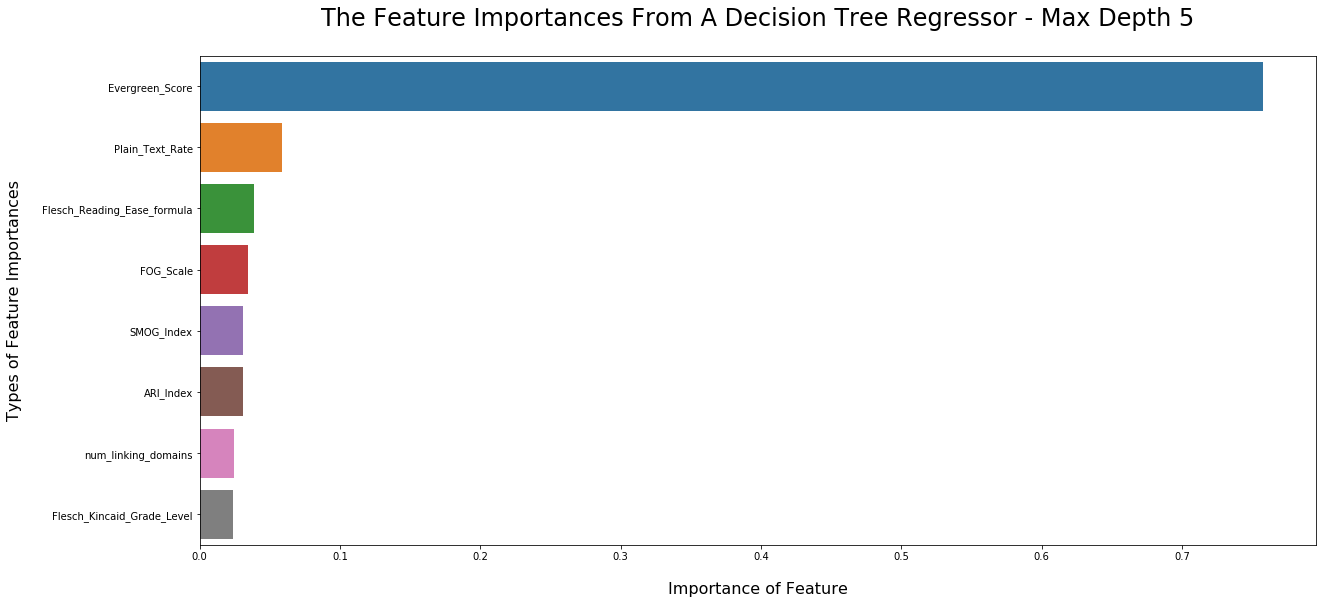

In [37]:
fig, ax = plt.subplots(figsize=(20, 9))
sns.barplot(x = [item[1] for item in new_list]  , y = [item[0] for item in new_list])
plt.xlabel('Importance of Feature', fontsize='16', labelpad=20)
plt.ylabel('Types of Feature Importances',  fontsize='16', labelpad=20)
label = ax.set_title('The Feature Importances From A Decision Tree Regressor - Max Depth 5', fontsize = 24, pad=30)
plt.savefig('Feature_Importances_Decision_Tree_Regressor',dpi=200)
plt.show()

- Evergreen_Score: If an article is deemed to be evergreen it is meant to be non-seasonal and information that is repeatedly searched for.
- Has_Article_Amplifiers: An article amplifier is defined as a key influencer who has an audience which is largest enough to amplify the publisher's article.
    

------------------------------------------------------------------------------------------------------------------------------

### Challenges

- 30,000 articles were downloded, however I was only able to obtain the article text data for 15,000 URL's, this was simply becuse the type of Python package that I was using wasn't able to extract the main body content for half of the data.
- Working with text data naturally creates sparse matrices, this can be problematic because it drastically increases the dimensionality of the feature space. In order to combat this challenge, a custom standard_scaler and TFID_vectorizer class were created in sci-kit learn for optimising the pipelines and grid_search process.
- The target variable 'Total Shares' was not normally distributed and was exponentially distributed. From taking the logorithim and adding +1 to all values we were able to create a better, more linear relationship between our predictor features and our target variable.
- Some of the articles had 404'ing pages, therefore whilst web scraping excessive exception handling was required to ensure that all of the features gathered were aligned to the correct URL's.
- The variables which our best predictors were only available via BuzzSumo, which means our predictions currently rely on a 3rd party tool. 

---------------------------------------------------------------------------------------------------------------------------------------------------

### Risks

* The sample that we chose was 1 year old, this was selected to remove any bias of an article not being online enough to receive a significant part of it's online shares. However this type of sample could lead to bias within the model's predictions. Therefore it would be advisable to study the natural share cycle of article's and the share velocity from when an article is originally published until it reaches a certain level of maturity.

------------------------------------------------------------------------------------------------------------------------------

### Assumptions

- We have assumed that by taking 1 month's worth of content for 8 topics that our sample is representative of the population for every individuaal topic.
- Taking a sample of articles for a 3 month people might not be a representative sample, furthermore seasonality might have an influential factor on how article's are shared across different topics. 

------------------------------------------------------------------------------------------------------------------------------

### Next Steps

* Sentiment analysis could be performed on all of the articles as this could be influencing the sharability of an article.

- Scrape additional topics and to expand the number of article's crawled to 100,000 + articles.
- To model the data on a neural network as from having to apply a logarithm to the target variable we can clearly see that the relationship is less linear with the original target variable scale. A neural network might be more able to model the non-linear relationships between the predictor matrix and the target variable.
- To scrape additional link metrics from 3rd party providers including:
    * Ahrefs
    * SEMrush
    * Majestic

    

------------------------------------------------------------------------------------------------------------------------------

* It would also be good idea to track articles / topics for several months or years. This would allow us to perform time series analysis on individual topics. We would then be ble to see what topics are increasing or decreasing over time and would be able to make predictions on what the number of article shares a particular topic group would receive in the future.
* Also it would be worth testing different scraping / article parsing libraries because NewsPaper3K was only able to scrape 50-55% of the original set of URL's. If we could improve the reliability of scraping the main content, then we would be able to acquire more data.

------------------------------------------------------------------------------------------------------------------------------